In [3]:
import pandas as pd

## Get the data

In [34]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [5]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


In [6]:
import pandas as pd

## Get the data

In [7]:
mortality_url = "https://data.cdc.gov/api/views/v6ab-adf5/rows.csv?accessType=DOWNLOAD"
mortality_data = pd.read_csv(mortality_url)

In [8]:
mortality_data.columns = mortality_data.columns.str.replace(" ", "")

In [9]:
mortality_data

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [10]:
mortality_data['MeanCentered'] = \
    mortality_data.DeathRate - mortality_data.DeathRate.mean()

In [11]:
mortality_data.AgeGroup.replace(
    to_replace = ['1-4 Years','5-9 Years'],
    value = ['01-04 Years','05-09 Years'],
    inplace = True)

C:\Users\a7n1g\AppData\Local\Temp\ipykernel_28104\4011209290.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mortality_data.AgeGroup.replace(


In [12]:
mortality_data

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584
...,...,...,...,...
471,2014,15-19 Years,45.5,-147.42416
472,2015,15-19 Years,48.3,-144.62416
473,2016,15-19 Years,51.2,-141.72416
474,2017,15-19 Years,51.5,-141.42416


In [13]:
mortality_wide = mortality_data.pivot(
    index="Year",columns="AgeGroup", values="DeathRate")
mortality_wide

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4
...,...,...,...,...
2014,24.0,11.5,14.0,45.5
2015,24.9,11.7,14.6,48.3
2016,25.3,12.2,14.6,51.2


<Axes: >

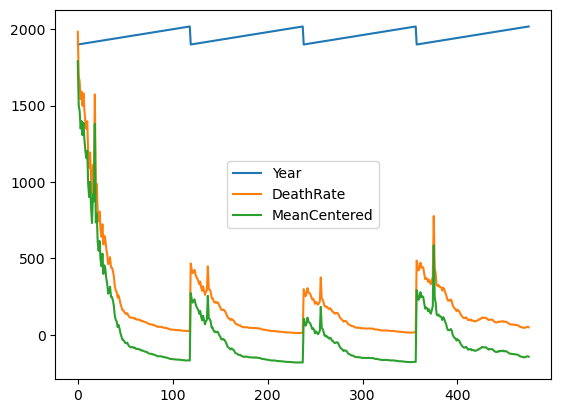

In [14]:
mortality_data.plot(kind="line")

<Axes: xlabel='Year', ylabel='DeathRate'>

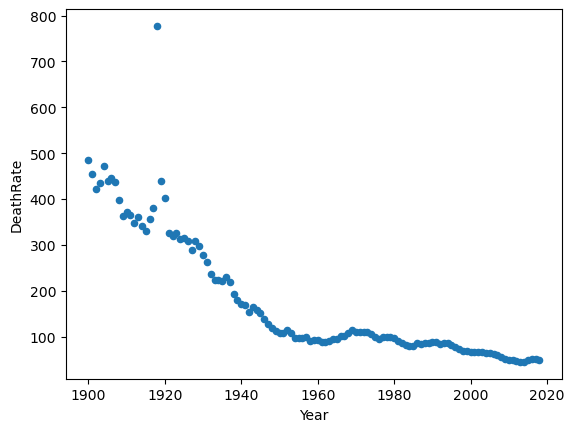

In [15]:
mortality_data.query("AgeGroup == '15-19 Years'").plot.scatter(x="Year", y="DeathRate")

<Axes: xlabel='Year'>

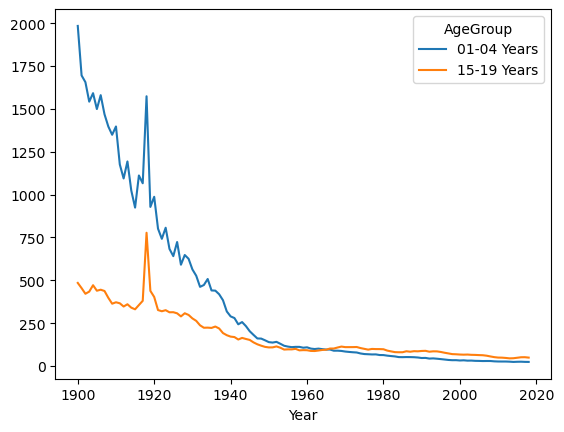

In [16]:
mortality_wide.plot.line(y=['01-04 Years', '15-19 Years'])

<Axes: xlabel='Year'>

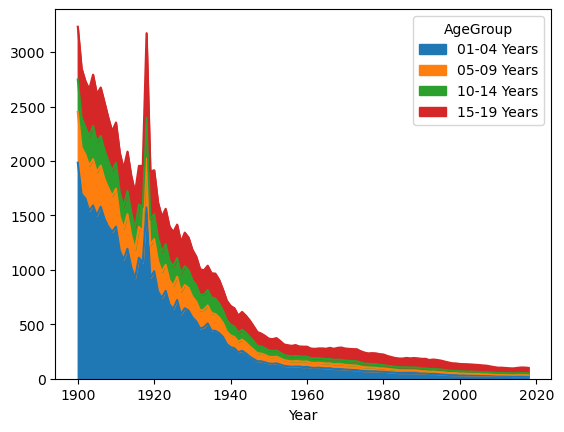

In [17]:
mortality_wide.plot(kind="area")

<Axes: xlabel='Year'>

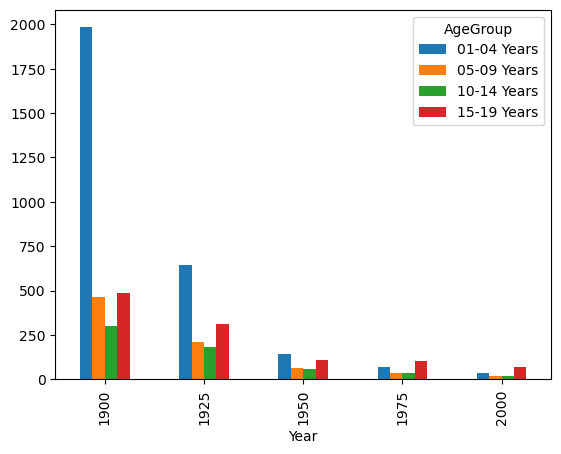

In [18]:
mortality_wide.query('Year in (1900,1925,1950,1975,2000)').plot.bar()

<Axes: xlabel='Year', ylabel='DeathRate'>

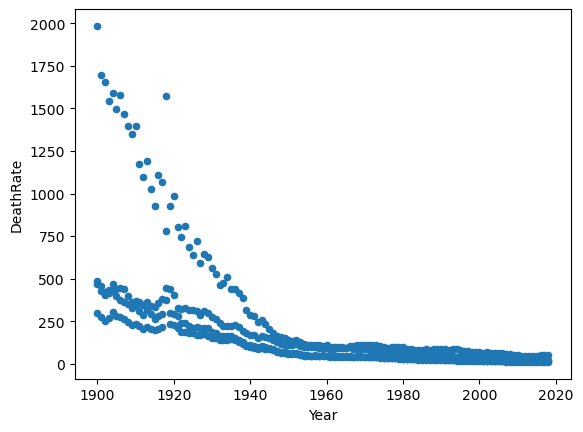

In [19]:
mortality_data.plot.scatter(x='Year', y='DeathRate')

<Axes: xlabel='Year'>

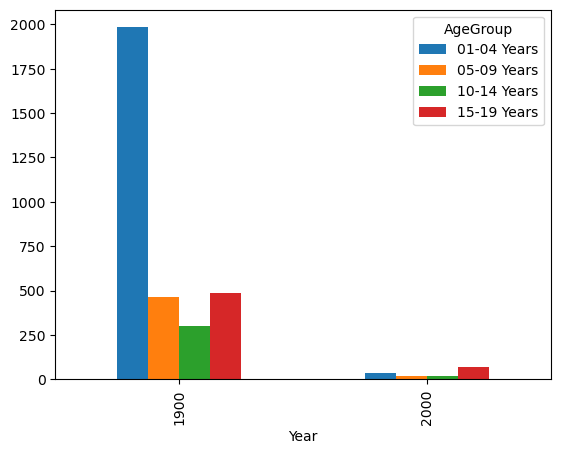

In [20]:
mortality_wide.query('Year in [1900,2000]').plot.bar()


<Axes: ylabel='Frequency'>

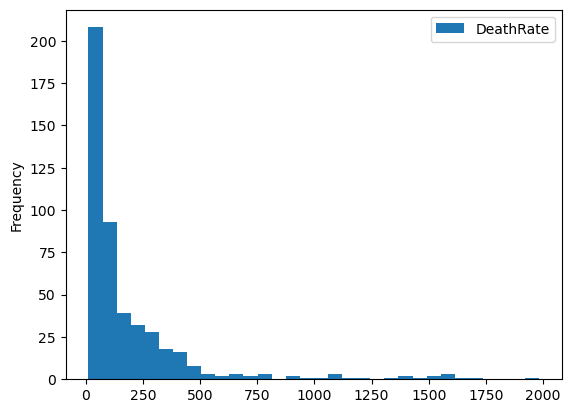

In [21]:
mortality_data.plot.hist(y='DeathRate', bins=32)


<Axes: ylabel='Density'>

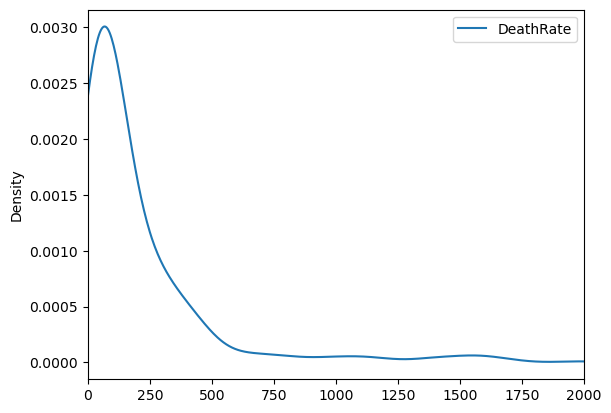

In [22]:
mortality_data.plot.density(y='DeathRate', xlim=(0,2000))


<Axes: >

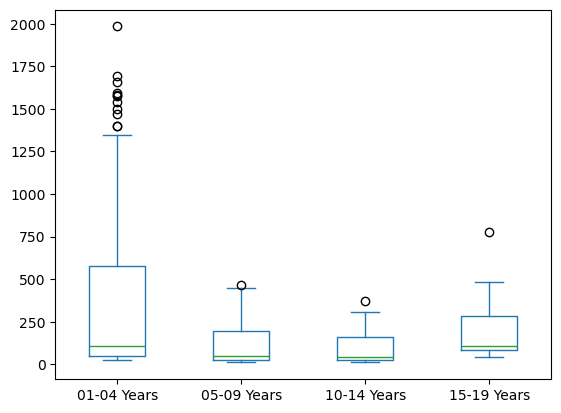

In [23]:
mortality_wide.plot.box()

<Axes: ylabel='DeathRate'>

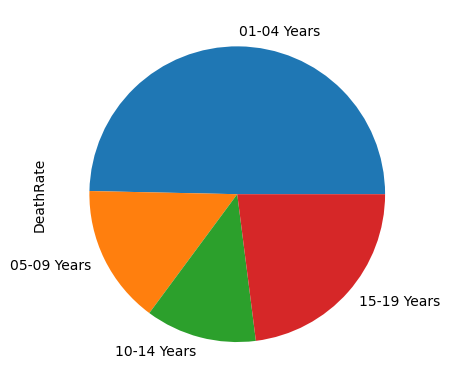

In [24]:
mortality_data.groupby('AgeGroup')['DeathRate'].sum().plot.pie()

<Axes: >

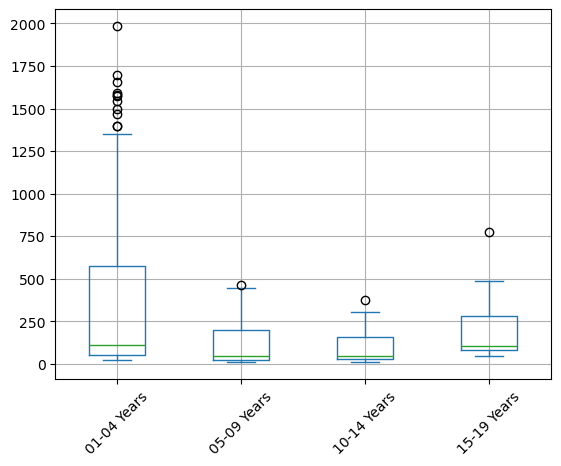

In [25]:
mortality_wide.plot.box(rot=45, grid=True)

<Axes: ylabel='DeathRate'>

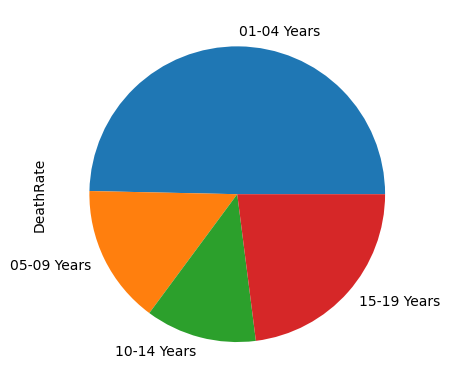

In [26]:
mortality_data.groupby('AgeGroup')['DeathRate'].sum().plot.pie()

<Axes: title={'center': 'Child Mortality: 1900-2018'}, xlabel='Year'>

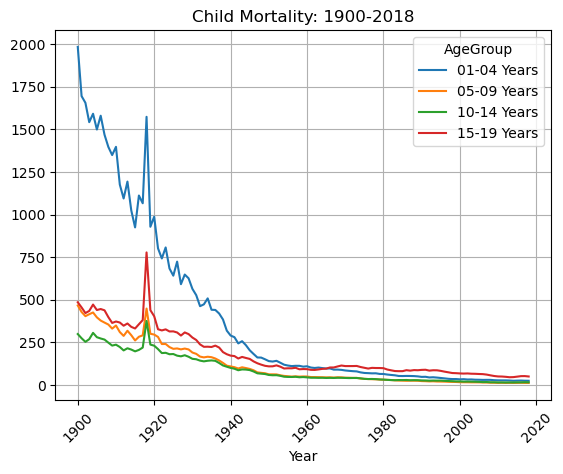

In [27]:
# mortality_wide.plot.line(title='Child Mortality: 1900-2018', ylabel='Deaths per 100,000', grid=True, rot=45)
mortality_wide.plot.line(title='Child Mortality: 1900-2018', grid=True, rot=45)

<Axes: title={'center': 'Child Mortality: 2000-2018'}, xlabel='Year'>

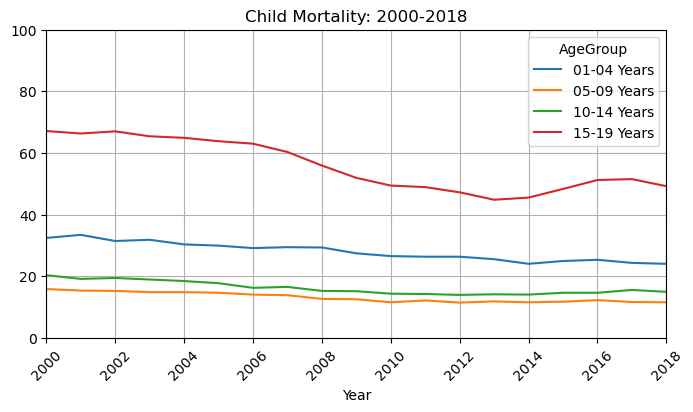

In [28]:
mortality_wide.plot.line(title='Child Mortality: 2000-2018',
     figsize=(8,4), grid=True,
     rot=45, xlim=(2000,2018), ylim=(0,100))

array([[<Axes: title={'center': 'Child Mortality: 01-04'}, xlabel='Year'>,
        <Axes: title={'center': 'Child Mortality: 05-09'}, xlabel='Year'>],
       [<Axes: title={'center': 'Child Mortality: 10-14'}, xlabel='Year'>,
        <Axes: title={'center': 'Child Mortality: 15-19'}, xlabel='Year'>]],
      dtype=object)

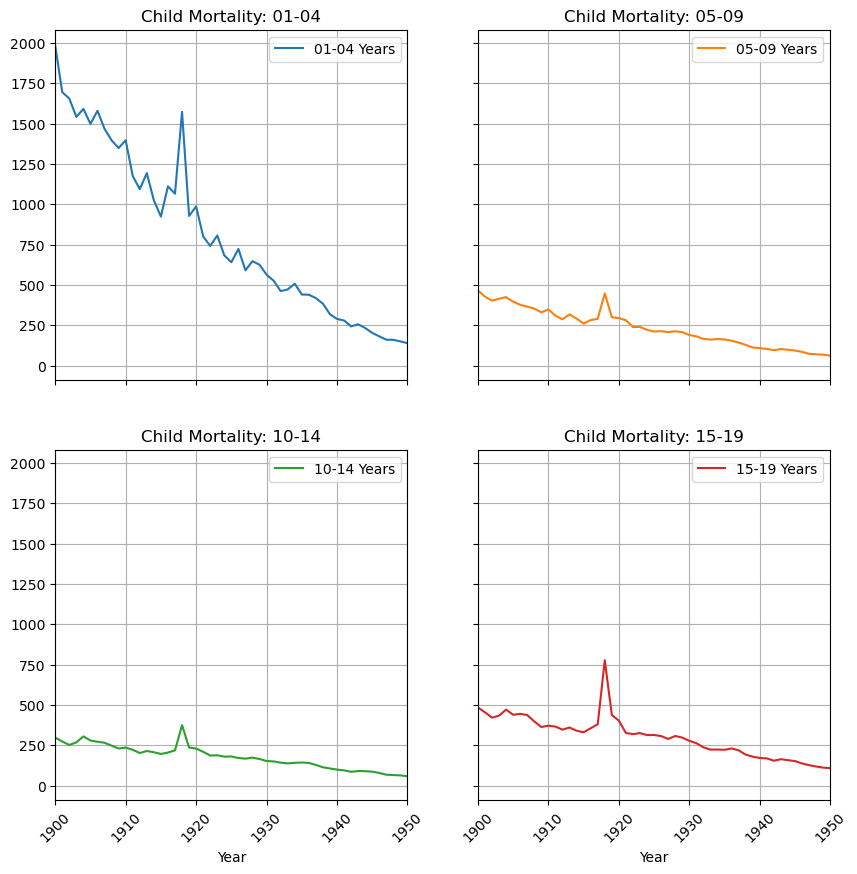

In [29]:
mortality_wide.plot.line(
    title=['Child Mortality: 01-04','Child Mortality: 05-09',
           'Child Mortality: 10-14','Child Mortality: 15-19'],
    sharey=True,
    grid=True, rot=45, xlim=(1900,1950), legend=True,
    subplots=True, layout=(2,2), figsize=(10,10))


<Axes: ylabel='AgeGroup'>

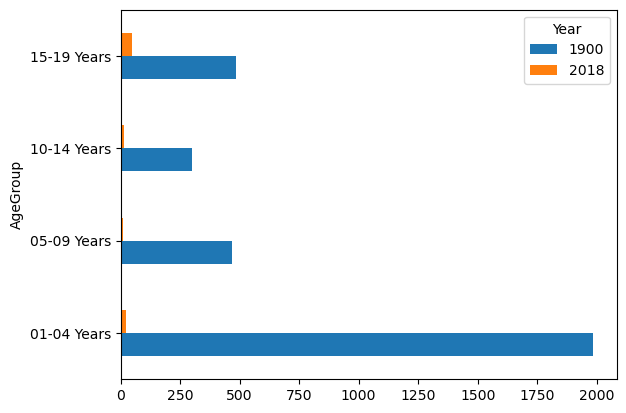

In [30]:
mortality_data.query('Year in (1900,2018)') \
     .pivot(index='AgeGroup', columns='Year',
            values='DeathRate').plot.barh()


<Axes: xlabel='Year'>

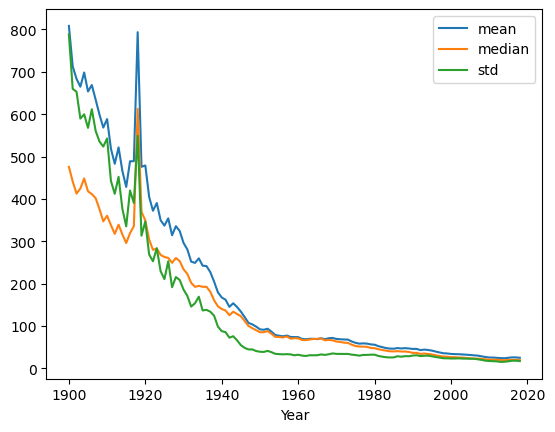

In [31]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std']) \
    .plot()
